In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [2]:
#open csv
df=pd.read_csv('/content/BestBuy_NodeXL_tweets_data_cleaned.csv')

In [3]:
df['Text'].values[0]

'my best buy members get early access to great deals not a member sign up for a free account to shop incredible savings'

In [4]:
example=df['Text'].values[5]

In [5]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('hey', 'JJ'),
 ('digital', 'JJ'),
 ('artists', 'NNS'),
 ('show', 'VBP'),
 ('us', 'PRP'),
 ('your', 'PRP$'),
 ('masterpiece', 'NN')]

In [7]:
!pip install TextBlob
from textblob import TextBlob

In [8]:
# Check the sentiment for a text

tang="I want to go out today" # Meaning? Feeling?  bagood,d, no feeling (neutral)
Tang=TextBlob(tang)
Tang.sentiment

#polarity from -1 to 1
#subjectivity from 0 to 1

Sentiment(polarity=0.0, subjectivity=0.0)

In [9]:
# Ensure the Text column is of type string and handle NaN values
df['Text'] = df['Text'].fillna('').astype(str)

# Define the function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the get_sentiment function to the Text column and create a new Sentiment column
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [10]:
print(df.columns)  # Check the column names in the DataFrame

# Step 2: Print the Sentiment column to verify its contents
print(df['Sentiment'])

# Convert the Sentiment column to numeric, coercing errors to NaN
df['Sentiment'] = pd.to_numeric(df['Sentiment'], errors='coerce')

# Drop rows with NaN values in the Sentiment column
df = df.dropna(subset=['Sentiment'])

# Count the number of positive, negative, and neutral sentiment tweets
num_positive_sentiments = len(df[df['Sentiment'] > 0])
num_negative_sentiments = len(df[df['Sentiment'] < 0])
num_neutral_sentiments = len(df[df['Sentiment'] == 0])

print("Number of positive sentiment tweets:", num_positive_sentiments)
print("Number of negative sentiment tweets:", num_negative_sentiments)
print("Number of neutral sentiment tweets:", num_neutral_sentiments)

Index(['Vertex1', 'Vertex2', 'Type', 'Date', 'Text', 'Link', 'Likes', 'Quotes',
       'Retweets', 'Comments', 'Sentiment'],
      dtype='object')
0      0.640000
1      0.200000
2     -0.600000
3      0.000000
4      1.000000
         ...   
863    0.223232
864    0.000000
865   -0.300000
866    0.000000
867    0.400000
Name: Sentiment, Length: 868, dtype: float64
Number of positive sentiment tweets: 557
Number of negative sentiment tweets: 94
Number of neutral sentiment tweets: 217


In [11]:
# Define a function to convert polarity score to sentiment category
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the categorize_sentiment function to the Sentiment column to create a new SentimentCategory column
df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

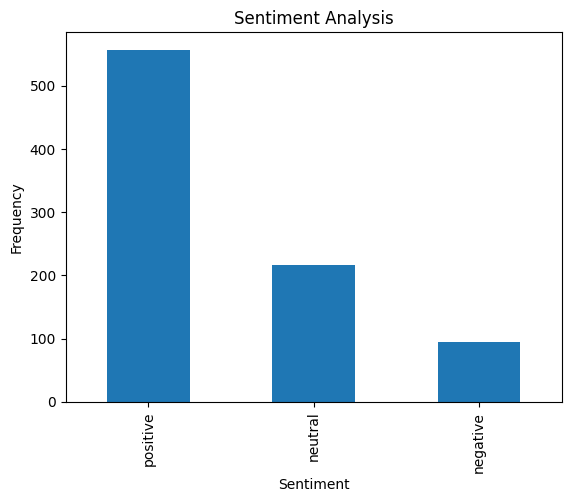

In [12]:
import matplotlib.pyplot as plt

#Count frequency of each sentiment
sentiment_counts = df['SentimentCategory'].value_counts()

#Plot the bar chart
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()